In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [26]:
train_path = 'images_data/train'
valid_path = 'images_data/validation' 
test_path = 'images_data/predict/'

In [27]:
name_of_people = ['amey', 'sandesh', 'vailantan', 'nathan', 'shoydon', 'vedant', 'manasvi', 'srijita']

In [28]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#   .flow_from_directory(train_path, target_size=(640,480), classes = name_of_people, batch_size=10)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#   .flow_from_directory(valid_path, target_size=(640, 480), 
#   classes=name_of_people, batch_size=10)

In [29]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) .flow_from_directory(train_path, target_size=(640, 480), classes=name_of_people, batch_size=30, shuffle=True)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(640,480), 
#   classes=name_of_people, batch_size=30, shuffle=True)

train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) .flow_from_directory(train_path, target_size=(640, 480), classes=name_of_people, batch_size=30, shuffle=True)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(640,480), 
  classes=name_of_people, batch_size=30, shuffle=True)

Found 298 images belonging to 8 classes.
Found 150 images belonging to 8 classes.


In [30]:
imgs, labels = next(train_batches)
print(imgs)

[[[[-2.4939003e+01 -2.5778999e+01 -2.8680000e+01]
   [-3.4939003e+01 -4.1778999e+01 -2.9680000e+01]
   [-2.9939003e+01 -4.4778999e+01 -2.2680000e+01]
   ...
   [ 1.1060997e+01  4.2210007e+00  2.6320000e+01]
   [ 1.2060997e+01  6.2210007e+00  1.4320000e+01]
   [ 1.5060997e+01  8.2210007e+00  1.2320000e+01]]

  [[-3.2939003e+01 -3.5778999e+01 -3.5680000e+01]
   [-3.6939003e+01 -4.6778999e+01 -3.2680000e+01]
   [-3.0939003e+01 -4.5778999e+01 -2.3680000e+01]
   ...
   [ 6.0609970e+00 -7.7899933e-01  2.1320000e+01]
   [ 1.3060997e+01  5.2210007e+00  1.3320000e+01]
   [ 1.8060997e+01  1.1221001e+01  1.7320000e+01]]

  [[-3.2939003e+01 -3.5778999e+01 -3.5680000e+01]
   [-3.6939003e+01 -4.6778999e+01 -3.2680000e+01]
   [-3.0939003e+01 -4.5778999e+01 -2.3680000e+01]
   ...
   [ 6.0609970e+00 -7.7899933e-01  2.1320000e+01]
   [ 1.3060997e+01  5.2210007e+00  1.3320000e+01]
   [ 1.8060997e+01  1.1221001e+01  1.7320000e+01]]

  ...

  [[-6.7939003e+01 -7.1778999e+01 -6.9680000e+01]
   [-8.2939003e+

In [31]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

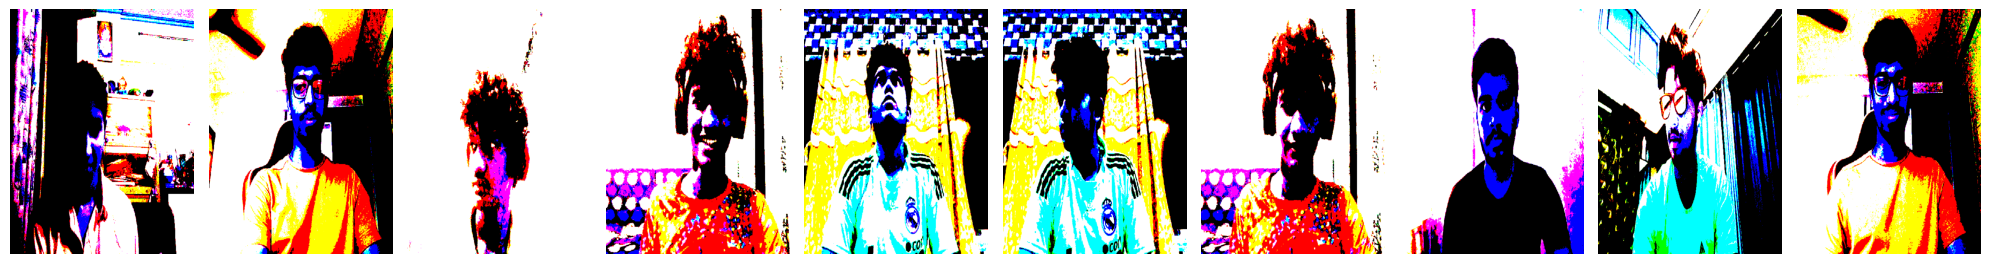

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


In [32]:
plotImages(imgs)
print(labels)

In [33]:
model = Sequential([
  Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(640, 480, 3)), MaxPool2D(pool_size=(2,2), strides=2),
  Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'), 
  MaxPool2D(pool_size=(2,2), strides=2),
  Flatten(),
  # Dense(units=256, activation='relu'),
  # Dense(units=128, activation='relu'),
  Dense(units=32, activation='relu'),
  Dense(units=len(name_of_people), activation='softmax')])

In [34]:
# model = Sequential([
#   Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(640, 480, 3)), MaxPool2D(pool_size=(2,2), strides=2),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'), 
#   MaxPool2D(pool_size=(2,2), strides=2),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
#   Flatten(),
#   Dense(units=128, activation='relu'),
#   Dense(units=128, activation='relu'),
#   Dense(units=len(name_of_people), activation='softmax')
# ])

In [35]:
# model.add(tf.keras.layers.Dense(len(name_of_people), activation='softmax'))

In [36]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# model.fit(x=train_batches, epochs=10, verbose=2)
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2, shuffle=True)

Epoch 1/5
10/10 - 13s - loss: 9.4292 - accuracy: 0.7148 - val_loss: 0.0102 - val_accuracy: 0.9933 - 13s/epoch - 1s/step
Epoch 2/5
10/10 - 13s - loss: 0.0952 - accuracy: 0.9799 - val_loss: 4.5180e-05 - val_accuracy: 1.0000 - 13s/epoch - 1s/step
Epoch 3/5
10/10 - 12s - loss: 1.1002e-04 - accuracy: 1.0000 - val_loss: 5.2054e-07 - val_accuracy: 1.0000 - 12s/epoch - 1s/step
Epoch 4/5
10/10 - 12s - loss: 5.5327e-06 - accuracy: 1.0000 - val_loss: 1.5259e-07 - val_accuracy: 1.0000 - 12s/epoch - 1s/step
Epoch 5/5
10/10 - 12s - loss: 2.0560e-06 - accuracy: 1.0000 - val_loss: 9.7751e-08 - val_accuracy: 1.0000 - 12s/epoch - 1s/step


TESTING THE MODEL

In [38]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=test_path, target_size=(640, 480), classes=name_of_people, batch_size=20, shuffle=False)

Found 78 images belonging to 8 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

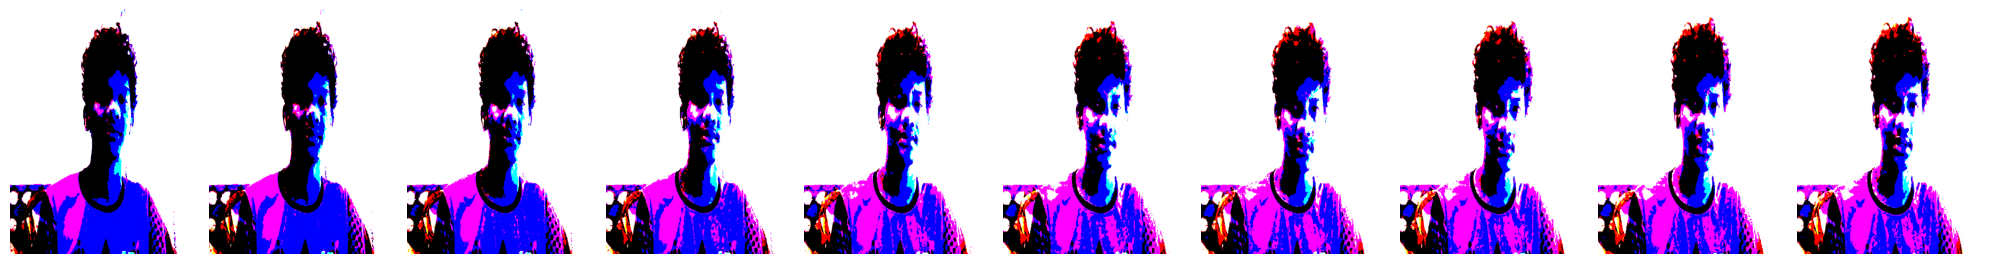

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [39]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
predictions = model.predict(x=test_batches, verbose=0)

In [41]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 

In [42]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [44]:
test_batches.class_indices

{'amey': 0,
 'sandesh': 1,
 'vailantan': 2,
 'nathan': 3,
 'shoydon': 4,
 'vedant': 5,
 'manasvi': 6,
 'srijita': 7}

Confusion Matrix, without normalization
[[10  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  5  0  0  0  2  3  0]
 [ 0  9  0  0  0  1  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0 10  0  0]]


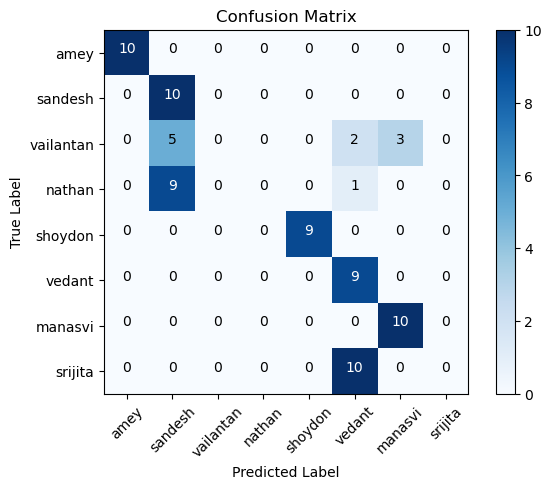

In [45]:
cm_plot_labels = name_of_people
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [46]:
# model.save('model/facerecognition')

In [47]:
# newModel = keras.models.load_model('model/facerecognition/')

In [48]:
# newModel.summary()